# Data Understanding

Perform the necessary steps to better understand the data.

We omit the step of data collection because I give you all the necessary data.

### Imports

In [4]:
# Import necessary libraries, functions, objects...

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Load dataset

In [5]:
df = pd.read_csv('data/bank/bank_term_deposit.csv')

## Describe the data

Perform a first, basic, inspection of the data: dimensions, first rows, column types, etc.

In [6]:
df.shape

(3063, 19)

In [7]:
df.head()

,id,split,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,labeled,31,management,married,tertiary,no,460,no,no,cellular,28,aug,13,14,-1,0,unknown,no
1,2,labeled,34,blue-collar,married,secondary,no,1826,yes,no,unknown,20,may,203,2,-1,0,unknown,no
2,3,labeled,50,blue-collar,married,secondary,no,290,yes,no,cellular,7,aug,226,3,-1,0,unknown,no
3,4,labeled,42,admin.,divorced,secondary,no,1077,yes,no,unknown,14,may,213,1,-1,0,unknown,no
4,5,labeled,47,services,single,secondary,no,41,yes,no,cellular,5,may,298,1,-1,0,unknown,no


## Exploratory Data Analysis (EDA)

Summarize main characteristics of the data with visualizations.


   - Statistiche descrittive
   - Distribuzione target (bilanciamento)
   - Distribuzione features
   - Correlazioni
   - Outliers
   - Relazioni tra variabili

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3063 entries, 0 to 3062
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         3063 non-null   int64 
 1   split      3063 non-null   object
 2   age        3063 non-null   int64 
 3   job        3063 non-null   object
 4   marital    3063 non-null   object
 5   education  3063 non-null   object
 6   default    3063 non-null   object
 7   balance    3063 non-null   int64 
 8   housing    3063 non-null   object
 9   loan       3063 non-null   object
 10  contact    3063 non-null   object
 11  day        3063 non-null   int64 
 12  month      3063 non-null   object
 13  duration   3063 non-null   int64 
 14  campaign   3063 non-null   int64 
 15  pdays      3063 non-null   int64 
 16  previous   3063 non-null   int64 
 17  poutcome   3063 non-null   object
 18  y          2007 non-null   object
dtypes: int64(8), object(11)
memory usage: 454.8+ KB


In [9]:
df.isnull().sum()

id              0
split           0
age             0
job             0
marital         0
education       0
default         0
balance         0
housing         0
loan            0
contact         0
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome        0
y            1056
dtype: int64

In [10]:
# Valori nulli assoluti e percentuali
null_info = pd.DataFrame({
    'Nulli': df.isnull().sum(),
    'Percentuale': (df.isnull().sum() / len(df)) * 100
})
print(null_info)

           Nulli  Percentuale
id             0     0.000000
split          0     0.000000
age            0     0.000000
job            0     0.000000
marital        0     0.000000
education      0     0.000000
default        0     0.000000
balance        0     0.000000
housing        0     0.000000
loan           0     0.000000
contact        0     0.000000
day            0     0.000000
month          0     0.000000
duration       0     0.000000
campaign       0     0.000000
pdays          0     0.000000
previous       0     0.000000
poutcome       0     0.000000
y           1056    34.476004


#### Distribuzioni variabili numeriche

In [12]:
# otra modalita´ di  Overview numeriche 

df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,3063.0,1843.997388,1029.326516,1.0,950.5,1886.0,2755.5,3521.0
age,3063.0,40.916422,9.921551,19.0,33.0,39.0,48.0,87.0
balance,3063.0,1313.493960,2768.188907,-2076.0,58.0,394.0,1334.5,42042.0
day,3063.0,16.133203,8.245610,1.0,9.0,16.0,22.0,31.0
duration,3063.0,205.055828,204.119886,4.0,89.0,153.0,247.0,2456.0
campaign,3063.0,2.903363,3.183655,1.0,1.0,2.0,3.0,44.0
pdays,3063.0,34.445642,96.050959,-1.0,-1.0,-1.0,-1.0,871.0
previous,3063.0,0.434215,1.475524,0.0,0.0,0.0,0.0,23.0


#### Categorie variabili categoriche:

In [13]:
categoriche = ['job', 'marital', 'education', 'default', 'housing', 
               'loan', 'contact', 'month', 'poutcome']

for col in categoriche:
    print(f"\n{col}:")
    print(df[col].value_counts())


job:
job
blue-collar      653
management       633
technician       537
admin.           335
services         297
self-employed    136
entrepreneur     122
retired          121
unemployed        88
housemaid         73
student           40
unknown           25
?                  3
Name: count, dtype: int64

marital:
marital
married     1936
single       774
divorced     353
Name: count, dtype: int64

education:
education
secondary    1589
tertiary      877
primary       477
unknown       120
Name: count, dtype: int64

default:
default
no     3008
yes      55
Name: count, dtype: int64

housing:
housing
yes    1821
no     1242
Name: count, dtype: int64

loan:
loan
no     2565
yes     498
Name: count, dtype: int64

contact:
contact
cellular     1855
unknown      1021
telephone     187
Name: count, dtype: int64

month:
month
may    1029
jul     485
aug     449
jun     386
nov     246
apr     164
feb     118
jan      93
oct      35
sep      29
dec      15
mar      14
Name: count, dtype: in

lavorare con Job

In [12]:

df[df['job'].isin(['unknown', '?'])]


,id,split,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
31,36,labeled,39,unknown,single,secondary,no,912,no,no,unknown,5,jun,20,1,-1,0,unknown,no
135,162,labeled,55,unknown,married,primary,no,158,no,no,unknown,4,sep,15,1,-1,0,unknown,no
141,168,labeled,43,unknown,married,tertiary,no,1942,no,no,unknown,19,jun,385,1,-1,0,unknown,no
183,221,labeled,31,unknown,divorced,tertiary,no,137,no,no,cellular,22,aug,385,9,-1,0,unknown,no
242,297,labeled,49,unknown,married,secondary,no,0,no,no,cellular,28,aug,173,2,-1,0,unknown,no
408,510,labeled,38,unknown,single,tertiary,no,0,no,no,cellular,11,sep,260,3,95,3,success,yes
612,770,labeled,59,unknown,married,unknown,no,3949,no,no,unknown,5,jun,48,2,-1,0,unknown,no
647,810,labeled,54,unknown,married,secondary,no,2214,no,no,cellular,12,nov,104,1,99,2,other,yes
742,923,labeled,53,unknown,married,primary,no,728,no,no,cellular,27,oct,759,2,-1,0,unknown,yes
758,942,labeled,71,unknown,married,tertiary,no,353,no,no,cellular,27,jan,208,1,93,2,failure,no


Decido di mettere insieme ? e unknown 


In [13]:
df['job'] = df['job'].replace('?', 'unknown')


In [14]:
categoriche = ['job', 'marital', 'education', 'default', 'housing', 
               'loan', 'contact', 'month', 'poutcome']

for col in categoriche:
    print(f"\n{col}:")
    print(df[col].value_counts())


job:
job
blue-collar      653
management       633
technician       537
admin.           335
services         297
self-employed    136
entrepreneur     122
retired          121
unemployed        88
housemaid         73
student           40
unknown           28
Name: count, dtype: int64

marital:
marital
married     1936
single       774
divorced     353
Name: count, dtype: int64

education:
education
secondary    1589
tertiary      877
primary       477
unknown       120
Name: count, dtype: int64

default:
default
no     3008
yes      55
Name: count, dtype: int64

housing:
housing
yes    1821
no     1242
Name: count, dtype: int64

loan:
loan
no     2565
yes     498
Name: count, dtype: int64

contact:
contact
cellular     1855
unknown      1021
telephone     187
Name: count, dtype: int64

month:
month
may    1029
jul     485
aug     449
jun     386
nov     246
apr     164
feb     118
jan      93
oct      35
sep      29
dec      15
mar      14
Name: count, dtype: int64

poutcome:
poutco

trovare numeri negativi

In [15]:
# Trova colonne con negativi
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    negativi = (df[col] < 0).sum()
    if negativi > 0:
        print(f"{col}: {negativi} negativi (min: {df[col].min()})")

balance: 269 negativi (min: -2076)
pdays: 2604 negativi (min: -1)


Distribuzione pdays per tipo di contact:
            count       mean         std  min  25%  50%  75%    max
contact                                                            
cellular   1855.0  51.886253  112.366759 -1.0 -1.0 -1.0 -1.0  871.0
telephone   187.0  42.577540   98.638899 -1.0 -1.0 -1.0 -1.0  460.0
unknown    1021.0   1.269344   36.111441 -1.0 -1.0 -1.0 -1.0  808.0

Numero di pdays=-1 per contact type:
contact
cellular     1442
telephone     148
unknown      1014
dtype: int64


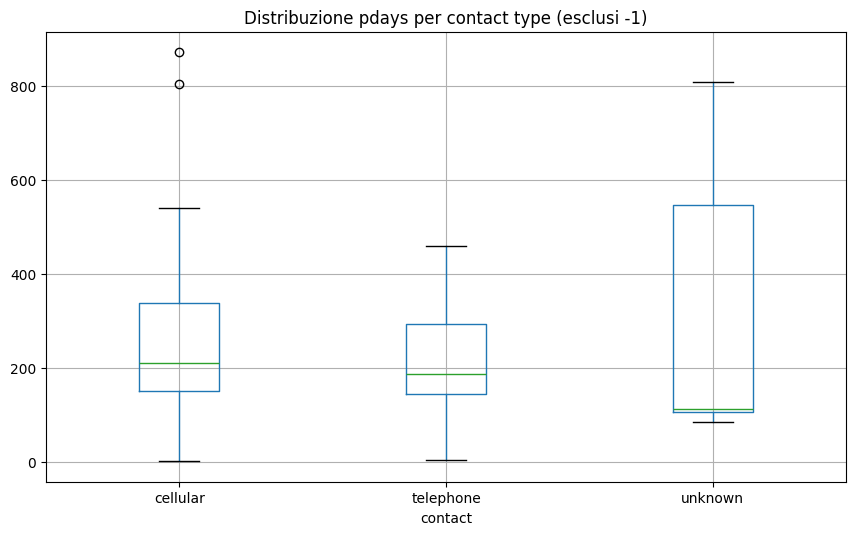


 % mai contattati (pdays=-1) per contact type:
contact
cellular     77.735849
telephone    79.144385
unknown      99.314398
dtype: float64


C:\Users\Alumne_mati1\AppData\Local\Temp\ipykernel_16264\4041895320.py:22: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  mai_contattati = df.groupby('contact').apply(


In [16]:
# 1. Crosstab base
pd.crosstab(df['contact'], df['pdays'] == -1, normalize='index') * 100

# 2. Più dettagliato
print("Distribuzione pdays per tipo di contact:")
print(df.groupby('contact')['pdays'].describe())

# 3. Conta quanti -1 per ogni contact type
print("\nNumero di pdays=-1 per contact type:")
print(df[df['pdays'] == -1].groupby('contact').size())



# Boxplot (escludendo -1 per vedere meglio la distribuzione)
df_no_minus1 = df[df['pdays'] != -1]
df_no_minus1.boxplot(column='pdays', by='contact', figsize=(10,6))
plt.title('Distribuzione pdays per contact type (esclusi -1)')
plt.suptitle('')  # Remove automatic title
plt.show()

# 5. Percentuale di "mai contattati" (-1) per ogni contact type
mai_contattati = df.groupby('contact').apply(
    lambda x: (x['pdays'] == -1).sum() / len(x) * 100
)
print("\n % mai contattati (pdays=-1) per contact type:")
print(mai_contattati)

In [17]:
df['pdays'].value_counts().sort_index()

pdays
-1      2604
 2         4
 5         1
 7         1
 57        1
        ... 
 541       1
 687       1
 804       1
 808       1
 871       1
Name: count, Length: 228, dtype: int64

decido di lasciare i numeri negativi cosi come sono ma aggiungere una colonna informativa rispetto contattati si o no

In [18]:
# 1. Crea la colonna dicotomica "contattato_prima"
# 0 = mai contattato (pdays = -1)
# 1 = contattato prima (pdays != -1)
df['contattato_prima'] = (df['pdays'] != -1).astype(int)

# 2. Sposta la nuova colonna PRIMA di pdays
# Trova la posizione di pdays
pdays_index = df.columns.get_loc('pdays')

# Rimuovi la colonna appena creata dalla fine
contattato_col = df.pop('contattato_prima')

# Inseriscila prima di pdays
df.insert(pdays_index, 'contattato_prima', contattato_col)

# 3. Verifica
print(df.columns.tolist())
print(df[['contattato_prima', 'pdays']].head(10))
print(df['contattato_prima'].value_counts())

['id', 'split', 'age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'contattato_prima', 'pdays', 'previous', 'poutcome', 'y']
   contattato_prima  pdays
0                 0     -1
1                 0     -1
2                 0     -1
3                 0     -1
4                 0     -1
5                 0     -1
6                 0     -1
7                 0     -1
8                 0     -1
9                 0     -1
contattato_prima
0    2604
1     459
Name: count, dtype: int64


In [19]:
df.head()

,id,split,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,contattato_prima,pdays,previous,poutcome,y
0,1,labeled,31,management,married,tertiary,no,460,no,no,cellular,28,aug,13,14,0,-1,0,unknown,no
1,2,labeled,34,blue-collar,married,secondary,no,1826,yes,no,unknown,20,may,203,2,0,-1,0,unknown,no
2,3,labeled,50,blue-collar,married,secondary,no,290,yes,no,cellular,7,aug,226,3,0,-1,0,unknown,no
3,4,labeled,42,admin.,divorced,secondary,no,1077,yes,no,unknown,14,may,213,1,0,-1,0,unknown,no
4,5,labeled,47,services,single,secondary,no,41,yes,no,cellular,5,may,298,1,0,-1,0,unknown,no


### Distribuzione target (bilanciamento)


#### DATA LEAKAGE - Cosa fare PRIMA e DOPO lo split

#### ✅ SAFE - Puoi fare PRIMA dello split (no leakage)
| Operazione | Perché è safe |
|------------|---------------|
| Guardare statistiche descrittive (`.describe()`) | Solo visualizzazione, non modifica dati |
| Vedere distribuzione target (`value_counts()`) | Solo esplorazione, non usa info dal test |
| Fare grafici e visualizzazioni | Solo osservazione, nessuna trasformazione |
| Esplorare correlazioni | Comprensione dei dati, non modifica |
| Analizzare missing values | Capire il problema, non risolverlo |
| Identificare outliers | Individuazione, non trattamento |

#### ❌ LEAKAGE - Devi fare DOPO lo split (solo su train)
| Operazione | Perché causa leakage |
|------------|---------------------|
| Scaling (StandardScaler, MinMaxScaler) | Usa media/std di tutto il dataset |
| Imputation missing (mediana, media, moda) | Calcola statistica su tutto il dataset |
| Target encoding | Usa la relazione feature-target di tutto il dataset |
| Feature selection (correlazioni con y) | Usa info del target dal test set |
| SMOTE o altri resampling | Crea dati sintetici usando info dal test |
| Rimozione outliers basata su soglie globali | Calcola soglie su tutto il dataset |

#### 📝 REGOLA D'ORO
**GUARDARE = OK ✅  |  MODIFICARE/CALCOLARE = DOPO SPLIT ❌**

Distribuzione target (y):
y
no     1833
yes     174
Name: count, dtype: int64

Percentuali:
y
no     91.330344
yes     8.669656
Name: proportion, dtype: float64


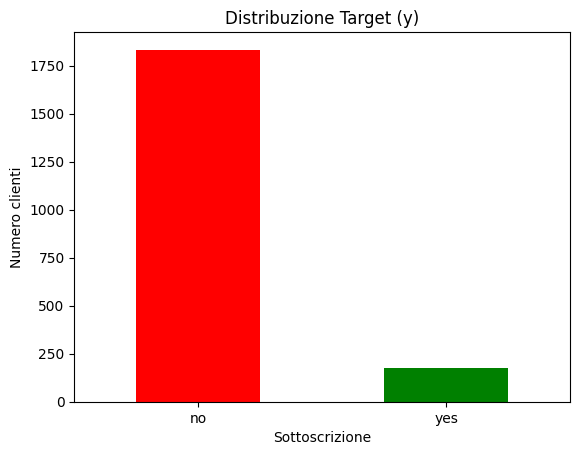

In [20]:
# 1. Conteggio assoluto
print("Distribuzione target (y):")
print(df['y'].value_counts())

# 2. Percentuali
print("\nPercentuali:")
print(df['y'].value_counts(normalize=True) * 100)

# 3. Grafico semplice
import matplotlib.pyplot as plt

df['y'].value_counts().plot(kind='bar', color=['red', 'green'])
plt.title('Distribuzione Target (y)')
plt.xlabel('Sottoscrizione')
plt.ylabel('Numero clienti')
plt.xticks(rotation=0)
plt.show()


### Distribuzione delle features

Cosa cercare:

Skewness (asimmetria): la distribuzione è sbilanciata?

Outliers: ci sono valori molto estremi?

Range: min e max sono ragionevoli?

Normalità: sembra una campana (gaussiana)?

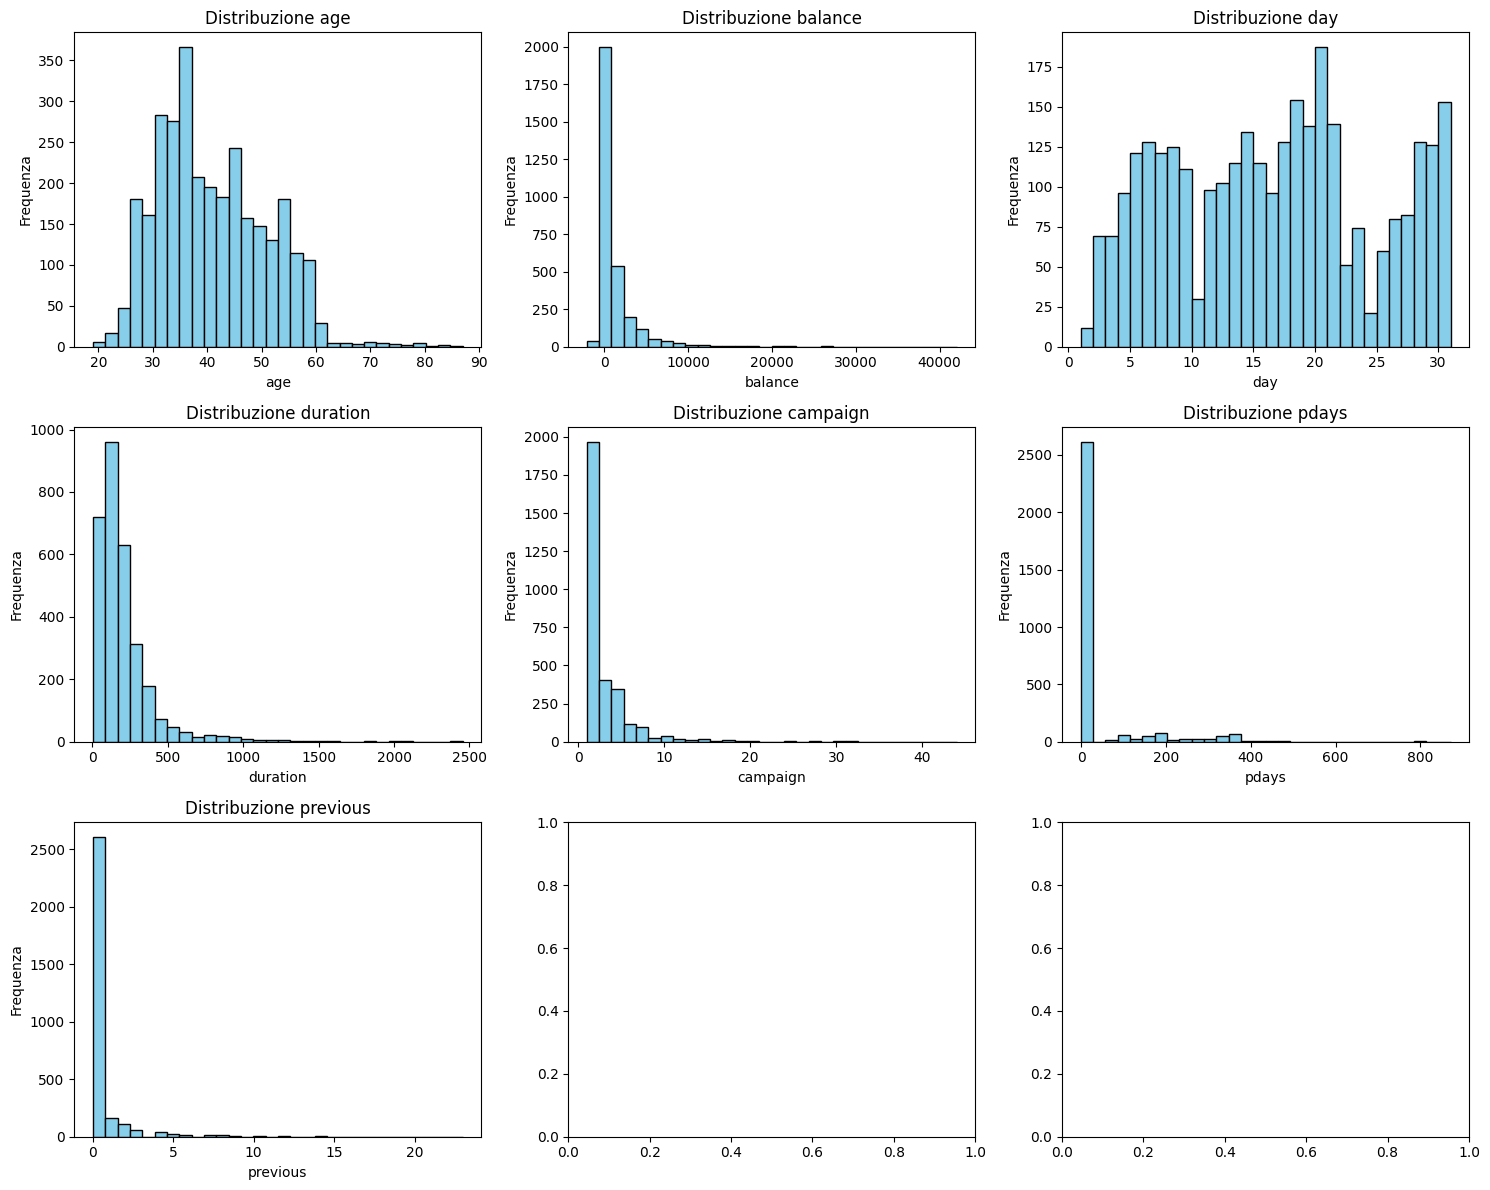

In [21]:


# Le tue features numeriche
numeriche = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# Histogrammi per tutte le numeriche
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(numeriche):
    axes[i].hist(df[col], bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Distribuzione {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequenza')

plt.tight_layout()
plt.show()


FEATURE: age
count    3063.000000
mean       40.916422
std         9.921551
min        19.000000
25%        33.000000
50%        39.000000
75%        48.000000
max        87.000000
Name: age, dtype: float64


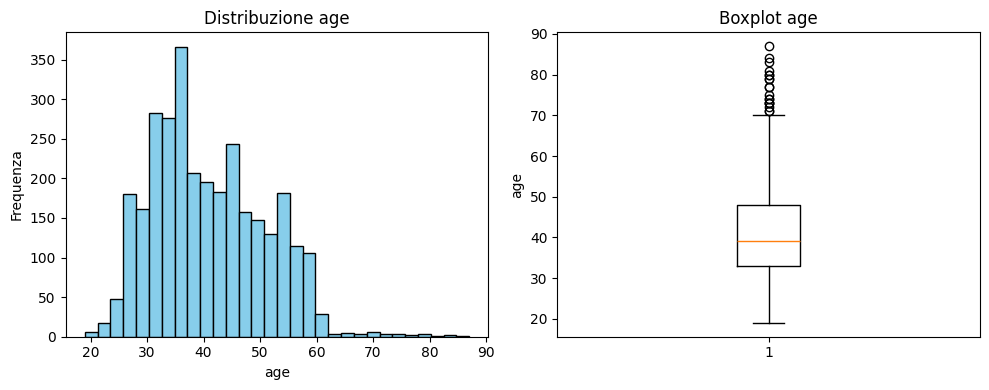


FEATURE: balance
count     3063.000000
mean      1313.493960
std       2768.188907
min      -2076.000000
25%         58.000000
50%        394.000000
75%       1334.500000
max      42042.000000
Name: balance, dtype: float64


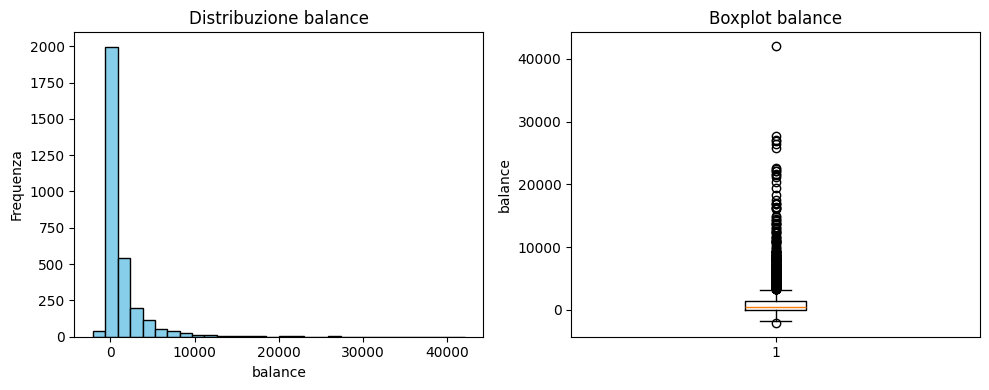


FEATURE: day
count    3063.000000
mean       16.133203
std         8.245610
min         1.000000
25%         9.000000
50%        16.000000
75%        22.000000
max        31.000000
Name: day, dtype: float64


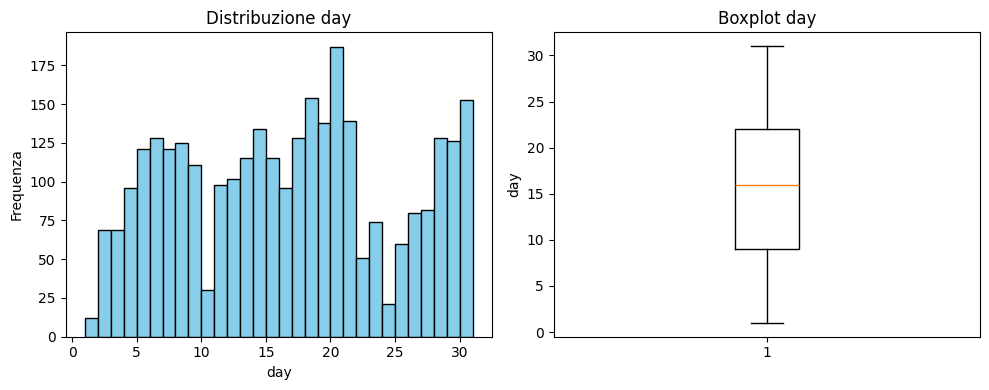


FEATURE: duration
count    3063.000000
mean      205.055828
std       204.119886
min         4.000000
25%        89.000000
50%       153.000000
75%       247.000000
max      2456.000000
Name: duration, dtype: float64


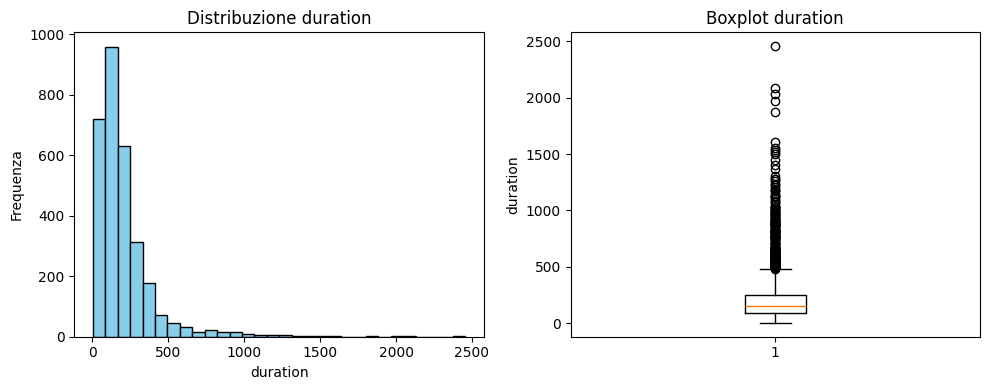


FEATURE: campaign
count    3063.000000
mean        2.903363
std         3.183655
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        44.000000
Name: campaign, dtype: float64


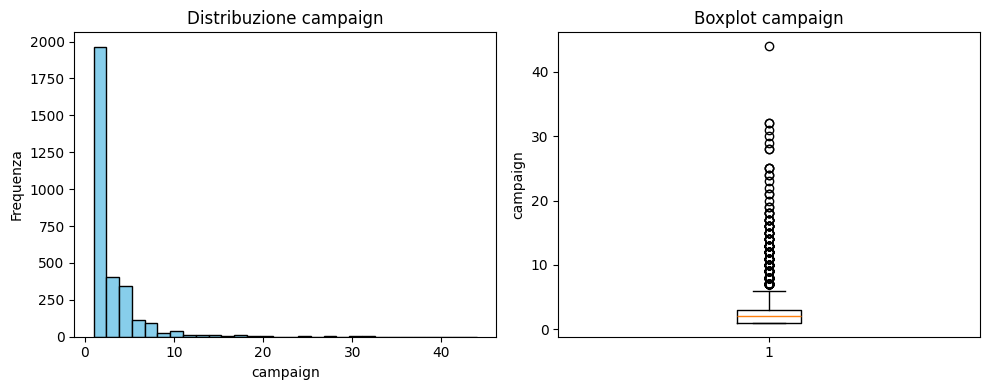


FEATURE: pdays
count    3063.000000
mean       34.445642
std        96.050959
min        -1.000000
25%        -1.000000
50%        -1.000000
75%        -1.000000
max       871.000000
Name: pdays, dtype: float64


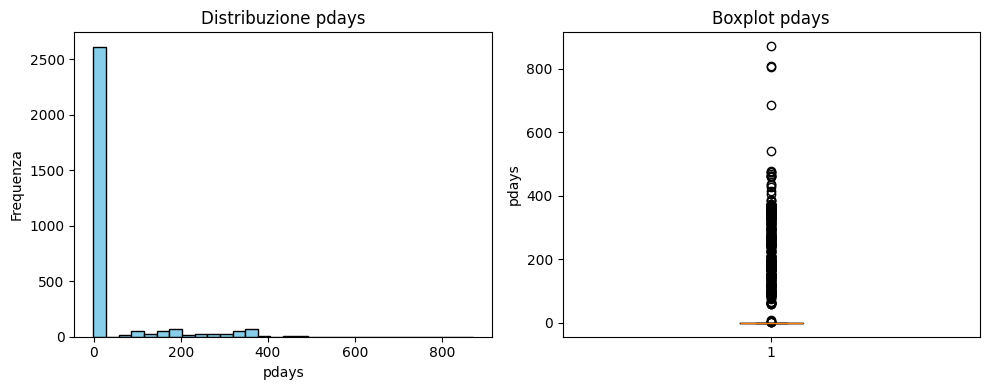


FEATURE: previous
count    3063.000000
mean        0.434215
std         1.475524
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        23.000000
Name: previous, dtype: float64


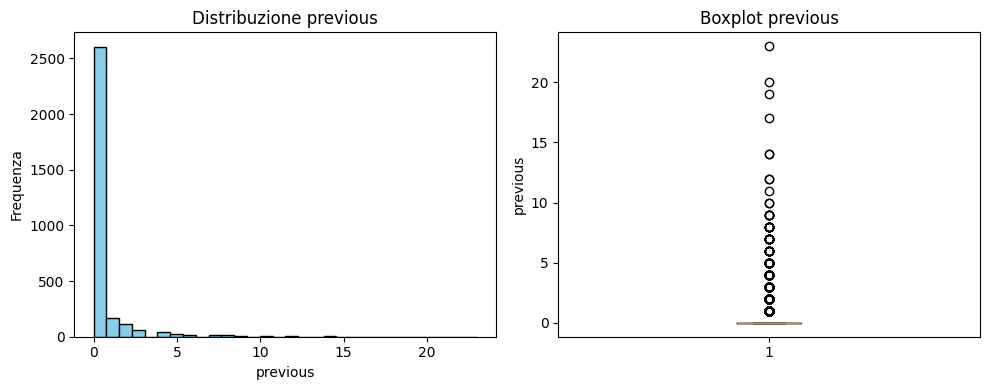

In [22]:
# Per ogni variabile numerica
for col in numeriche:
    print(f"\n{'='*50}")
    print(f"FEATURE: {col}")
    print(f"{'='*50}")
    print(df[col].describe())
    
    # Grafico
    plt.figure(figsize=(10, 4))
    
    # Histogram
    plt.subplot(1, 2, 1)
    plt.hist(df[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribuzione {col}')
    plt.xlabel(col)
    plt.ylabel('Frequenza')
    
    # Boxplot
    plt.subplot(1, 2, 2)
    plt.boxplot(df[col])
    plt.title(f'Boxplot {col}')
    plt.ylabel(col)
    
    plt.tight_layout()
    plt.show()

####  🔍 STEP 1: Guarda la FORMA (Histogram)




| Forma | Cosa significa | Esempio nei tuoi dati |
|-------|----------------|----------------------|
| **Campana** (simmetrica) | Distribuzione normale, dati bilanciati | **age** - la maggior parte tra 30-50 anni |
| **Picco a sinistra** (right-skewed) | Molti valori bassi, pochi alti | **balance, duration, campaign, previous** |
| **Picco a destra** (left-skewed) | Molti valori alti, pochi bassi | (nessuno nei tuoi dati) |
| **Uniforme** (piatta) | Tutti i valori ugualmente frequenti | **day** - abbastanza uniforme 1-31 |
| **Picco UNICO dominante** | Un valore super frequente | **pdays** - quasi tutti a -1 |

#### 📦 STEP 2: Guarda il BOXPLOT
| Elemento | Cosa guardare | Cosa significa |
|----------|---------------|----------------|
| **Scatola** (box) | Dove stanno il 50% dei dati | Più stretta = dati concentrati |
| **Linea arancione** | Mediana (valore centrale) | Dove sta il "tipico" valore |
| **Baffi** (whiskers) | Range dei dati "normali" | Quanto sono dispersi |
| **Pallini fuori** | Outliers | Valori strani/estremi |

#### 🎯 STEP 3: INTERPRETA ogni Feature
1. AGE ✅
- **Forma**: Campana → distribuzione normale
- **Range**: 19-87 anni, mediana 39
- **Outliers**: Pochi, alcuni anziani (80+)
- **Conclusione**: Età bilanciata, dati buoni
2. BALANCE ⚠️
- **Forma**: Picco a sinistra → MOLTO sbilanciata (right-skewed)
- **Problema**: Maggior parte ha balance basso (0-2000), pochi con balance alto (10k-40k)
- **Outliers**: TANTI! (balance > 10k)
- **Azione necessaria**: Potrebbe servire LOG TRANSFORMATION o rimozione outliers
3. DAY ✅
- **Forma**: Abbastanza uniforme (1-31)
- **Conclusione**: Giorni del mese distribuiti bene, nessun problema
4. DURATION ⚠️⚠️
- **Forma**: Picco fortissimo a sinistra → ESTREMA skewness
- **Problema**: Maggior parte chiamate corte (0-200 sec), poche lunghissime (2000+ sec)
- **Outliers**: TANTISSIMI!
- **ATTENZIONE**: Duration è "future leak" (durante la chiamata non sai quanto durerà)
- **Azione**: Valuta se escluderla o trasformarla (log)
5. CAMPAIGN ⚠️
- **Forma**: Picco ENORME a 1-2 contatti
- **Problema**: Pochi clienti contattati molte volte (30-40 volte!)
- **Outliers**: Sì, alcuni contattati 40+ volte
- **Conclusione**: Distribuzione molto sbilanciata, considera log/binning
6. PDAYS ⚠️⚠️⚠️
- **Forma**: Picco DOMINANTE a -1 (mai contattati)
- **Problema**: 85% ha valore -1, solo 15% ha valori reali
- **Boxplot**: Inutile, tutti outliers perché -1 domina
- **Azione**: Hai già creato "contattato_prima" → PERFETTO! ✅
7. PREVIOUS ⚠️
- **Forma**: Picco fortissimo a 0 (mai contattati prima)
- **Problema**: Stessa storia di pdays
- **Outliers**: Alcuni con 20+ contatti precedenti
- **Conclusione**: Molto sbilanciata, simile a pdays

 Gestione "Unknown" (già fatto parzialmente)

In [23]:
# Job: già unificato ? → unknown ✅
# Education, contact, poutcome: lasciati "unknown" ✅

# Verifica che sia tutto ok
categoriche = ['job', 'education', 'contact', 'poutcome']
for col in categoriche:
    print(f"\n{col}:")
    print(df[col].value_counts())


job:
job
blue-collar      653
management       633
technician       537
admin.           335
services         297
self-employed    136
entrepreneur     122
retired          121
unemployed        88
housemaid         73
student           40
unknown           28
Name: count, dtype: int64

education:
education
secondary    1589
tertiary      877
primary       477
unknown       120
Name: count, dtype: int64

contact:
contact
cellular     1855
unknown      1021
telephone     187
Name: count, dtype: int64

poutcome:
poutcome
unknown    2604
failure     286
other        97
success      76
Name: count, dtype: int64


| Feature | Unknown | % | Status |
|---------|---------|---|--------|
| job | 28 | 0.9% | ✅ Unificato (? → unknown) |
| education | 120 | 3.9% | ✅ Lasciato come categoria |
| contact | 1021 | 33.3% | ✅ Lasciato (= no contact info) |
| poutcome | 2604 | 85% | ✅ Lasciato (= mai contattato) |

In [26]:
# 1. DUPLICATI
print("="*50)
print("CHECK DUPLICATI")
print("="*50)
print(f"Numero di righe duplicate: {df.duplicated().sum()}")

if df.duplicated().sum() > 0:
    print(f"\nVuoi vedere i duplicati? Prime 10:")
    print(df[df.duplicated(keep=False)].head(10))

# 2. AGE IMPOSSIBILI
print("\n" + "="*50)
print("CHECK AGE")
print("="*50)
print(f"Age < 18: {(df['age'] < 18).sum()}")
print(f"Age > 100: {(df['age'] > 100).sum()}")
print(f"Range age: {df['age'].min()} - {df['age'].max()}")

# 3. CAMPAIGN ESTREMI
print("\n" + "="*50)
print("CHECK CAMPAIGN")
print("="*50)
print(f"Campaign > 20: {(df['campaign'] > 20).sum()}")
print(f"Max campaign: {df['campaign'].max()}")

# 4. INCONSISTENZE LOGICHE
print("\n" + "="*50)
print("CHECK INCONSISTENZE")
print("="*50)

# Inconsistenza 1: contattato_prima=1 ma pdays=-1
inc1 = df[(df['contattato_prima'] == 1) & (df['pdays'] == -1)]
print(f"Inconsistenze contattato_prima vs pdays: {len(inc1)}")

# Inconsistenza 2: previous > 0 ma poutcome=unknown
inc2 = df[(df['previous'] > 0) & (df['poutcome'] == 'unknown')]
print(f"Inconsistenze previous vs poutcome: {len(inc2)}")

CHECK DUPLICATI
Numero di righe duplicate: 0

CHECK AGE
Age < 18: 0
Age > 100: 0
Range age: 19 - 87

CHECK CAMPAIGN
Campaign > 20: 17
Max campaign: 44

CHECK INCONSISTENZE
Inconsistenze contattato_prima vs pdays: 0
Inconsistenze previous vs poutcome: 0
